# Regresi√≥n Lineal Simple

* Estudiar si existe un comportamiento lineal entre dos variables
num√©ricas
* Ver si una de las variables (a la que llamaremos variable independiente) nos ayuda a predecir o explicar el comportamiento de otra variable (que llamaremos dependiente)
* Ejemplo: Estudiar c√≥mo cambia el peso de una persona de acuerdo a su edad
* ¬øPodemos afirmar, con un cierto nivel de significaci√≥n, que existe evidencia de que el peso de una persona tiende a aumentar con la edad?
* ¬øPodemos predecir, aproximadamente, la cantidad de grasa en sangre seg√∫n la edad de la persona? ¬øQu√© grado de confianza tiene esa predicci√≥n?

* Objetivo: Encontrar la recta que mejor ajusta a los datos
* Hay que definir un criterio para elegir la recta que mejor ajusta a los datos --> y = Œ≤0 + Œ≤1x
* Predicho: punto sobre la recta --> (x, ≈∑)
* Residuo: distancia entre el punto y la recta --> r = y - ≈∑

* Encontrar los par√°metros Œ≤0 y Œ≤1
    * Matem√°ticos: M√©todo de M√≠nimos Cuadrados (MC)
    * Estad√≠stico: Modelo de Regresi√≥n Lineal (MRL)

* Covarianza entre dos VA --> Cov(X, Y) = E[(X ‚àí E(X))(Y ‚àí E(Y))]
    *  Cov(X, Y) > 0: ambas variables tienden a aumentar juntas (relaci√≥n positiva)
    *  Cov(X, Y) < 0: cuando una variable aumenta, la otra tiende a disminuir (relaci√≥n negativa)
    *  Cov(X, Y) ‚âà 0: no hay relaci√≥n lineal clara

* Coeficiente de correlaci√≥n lineal: œÅxy = Cov(X, Y) / (sqrt(Var(X)) * sqrt(Var(Y)))
* Toma valores entre [-1, 1]

## Modelo de regresi√≥n lineal simple

* Estudia la relaci√≥n entre dos variables aleatorias:
    * X = variable predictora, regresora o explicativa
    * Y = variable dependiente o respuesta

* Permita:
    * Analizar si existe una relaci√≥n lineal entre ambas variables
    * Cuantificar esta relaci√≥n mediante un estudio del modelo
    * Predecir el valor de Y para un valor dado de X = x

* Forma: Yi = Œ≤0 + Œ≤1Xi + Œµi
  * Œ≤0: ordenada al origen o intercept, indica el valor medio de Y cuando X = 0
  * Œ≤1: pendiente, indica la variaci√≥n media de la variable respuesta cuando X var√≠a en una unidad
  * Œµi: errores --> Œµi ‚àº N(0, œÉ^2)
* Se desconocen los par√°metros: Œ≤0, Œ≤1 y œÉ. Hay que estimarlos
* M√©todo de M√°xima Verosimilitud (MV) para estimar los par√°metros: ^Œ≤0 MV, ^Œ≤1 MV y ^œÉ^2MV
* Encontrar el valor del par√°metro que maximiza la funci√≥n de verosimilitud, es decir, la probabilidad (o densidad) de observar los datos muestrales, dados esos par√°metros

### Ejemplo

In [47]:
library(ggplot2)
library(GGally)

In [48]:
setwd("/Users/ppando/Materias/data/materias/aprendizaje-automatico/bd")

In [72]:
# Lectura del archivo
grasas <- read.csv("Grasas.csv", sep = ";")

In [74]:
# Visualizaci√≥n de variables
names(grasas)

[1] "peso"   "edad"   "grasas"

In [75]:
# Visualizaci√≥n de la estructura del archivo
str(grasas)

'data.frame':	25 obs. of  3 variables:
 $ peso  : int  84 73 65 70 76 69 63 72 79 75 ...
 $ edad  : int  46 20 52 30 57 25 28 36 57 44 ...
 $ grasas: int  354 190 405 263 451 302 288 385 402 365 ...


In [51]:
head(grasas)

peso edad grasas
1 84   46   354   
2 73   20   190   
3 65   52   405   
4 70   30   263   
5 76   57   451   
6 69   25   302

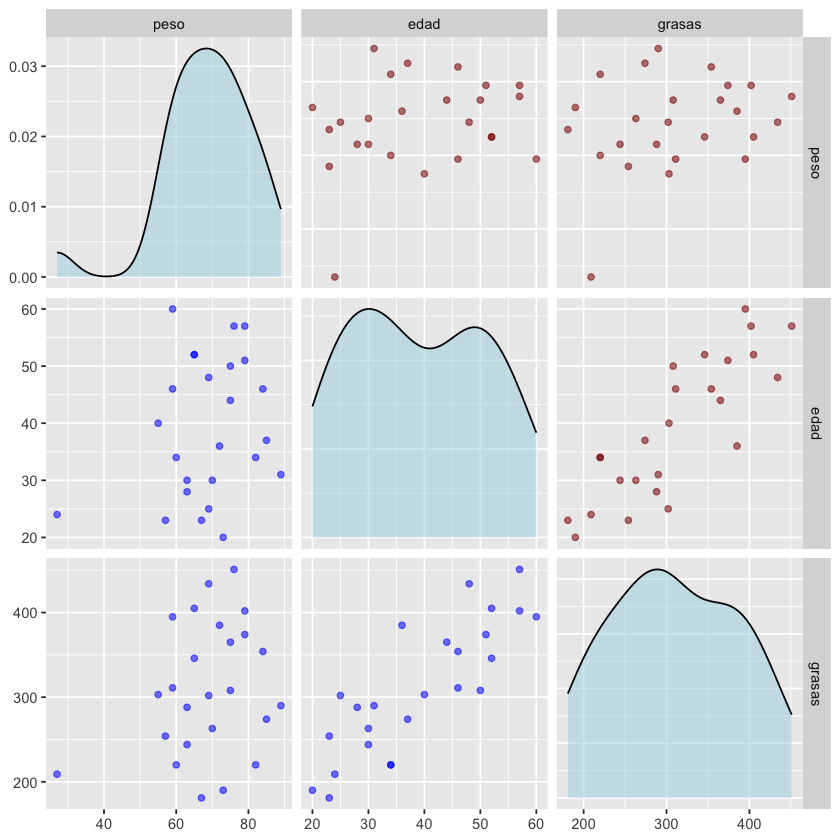

In [100]:
# Gr√°fico de dispersi√≥n (para explorar c√≥mo se relacionan las variables entre s√≠)
ggpairs(grasas,
        columns = 1:3,
        mapping = aes(alpha = 0.9),
        upper = list(continuous = wrap("points", color = "darkred")),
        lower = list(continuous = wrap("points", color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))

El gr√°fico sugiere la presencia de una relaci√≥n lineal entre las variables edad y grasas. En cambio, no se observa una asociaci√≥n evidente entre los otros pares de variables.

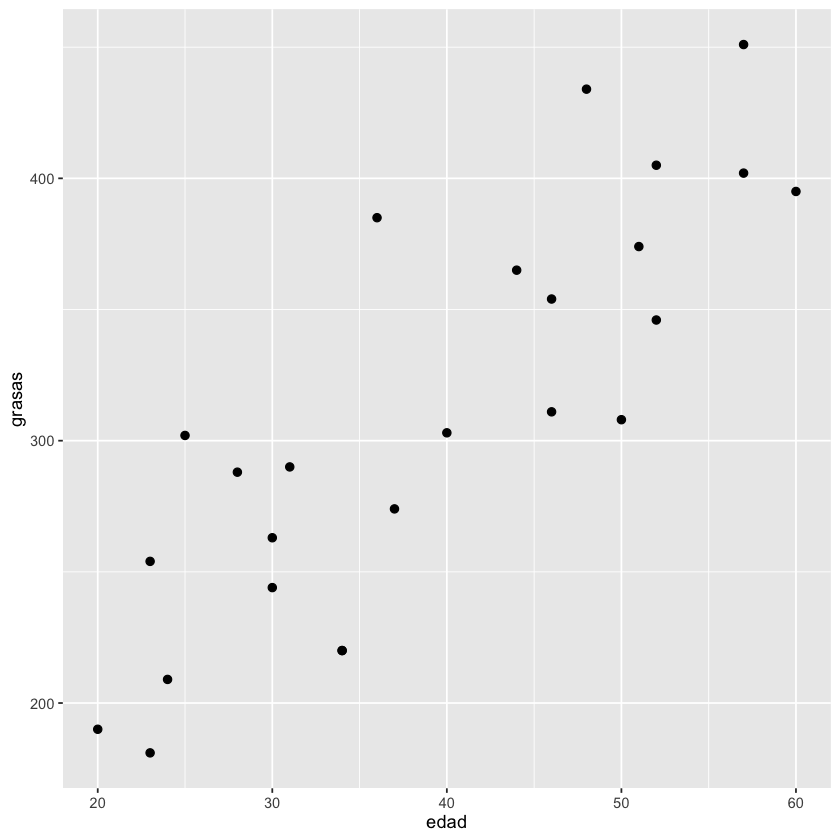

In [101]:
# scatter plot
ggplot(data=grasas, aes(x=edad, y=grasas)) + geom_point(size=2)

### Planteo del modelo de regresi√≥n lineal

In [91]:
regresion <- lm(grasas ~ edad, data = grasas)
regresion


Call:
lm(formula = grasas ~ edad, data = grasas)

Coefficients:
(Intercept)         edad  
    102.575        5.321  


In [92]:
summary(regresion)


Call:
lm(formula = grasas ~ edad, data = grasas)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.816  -3.854  28.315  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5751    29.6376   3.461  0.00212 ** 
edad          5.3207     0.7243   7.346 1.79e-07 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 43.46 on 23 degrees of freedom
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6882 
F-statistic: 53.96 on 1 and 23 DF,  p-value: 1.794e-07


In [93]:
names(regresion)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

### Extracci√≥n de los coeficientes del modelo

In [94]:
regresion$coefficients

(Intercept)        edad 
 102.575142    5.320676

In [95]:
b0 <- round(regresion$coefficients[1],2)
b0

(Intercept) 
     102.58

In [96]:
b1 <- round(regresion$coefficients[2],2)
b1

edad 
5.32

### Interpretaci√≥n de los par√°metros del modelo

* **^Œ≤0** = 102.5751, representa la cantidad estimada de grasas en sangre cuando la edad es igual a cero
* **^Œ≤1** = 5.3207, indica que, en promedio, un incremento de una unidad en la edad se asocia con un aumento del 5.321 unidades en la cantidad de grasas en sangre

* La ecuaci√≥n de la recta que mejor se ajusta a este conjunto de datos es:
    * **y = 102.57 + 5.321x**

### Gr√°fico de dispersi√≥n y recta de regresi√≥n ajustada

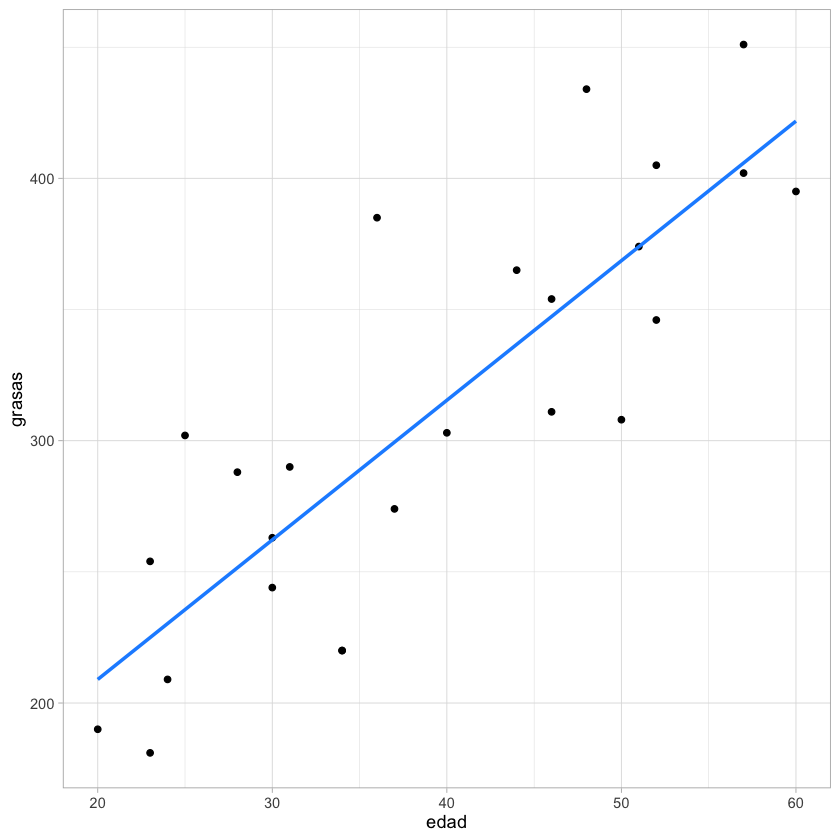

In [97]:
ggplot(grasas, aes(x=edad, y=grasas)) + 
  geom_point() +
  geom_smooth(method='lm', formula=y~x, se=FALSE, col='dodgerblue1') +
  theme_light()

### Valores predichos

In [98]:
regresion$fitted.values

1        2        3        4        5        6        7        8 
347.3263 208.9887 379.2503 262.1954 405.8537 235.5921 251.5541 294.1195 
       9       10       11       12       13       14       15       16 
405.8537 336.6849 230.2714 267.5161 379.2503 224.9507 421.8157 357.9676 
      17       18       19       20       21       22       23       24 
283.4781 373.9296 368.6090 283.4781 347.3263 224.9507 299.4402 315.4022 
      25 
262.1954

### Residuos

In [99]:
regresion$residuals

1            2            3            4            5            6 
  6.67374689 -18.98866868  25.74968894   0.80456808  45.14630732  66.40794970 
           7            8            9           10           11           12 
 36.44592073  90.88051013  -3.85369268  28.31509954 -21.27137398  22.48389175 
          13           14           15           16           17           18 
-33.25031106  29.04930235 -26.81572165  76.03239424 -63.47813722   0.07036527 
          19           20           21           22           23           24 
-60.60895841 -63.47813722 -36.32625311 -43.95069765 -25.44016619 -12.40219517 
          25 
-18.19543192

## Diagn√≥stico de la regresi√≥n

* Son t√©cnicas que permiten validar el cumplimiento de los supuestos del modelo planteado
* Se basan en el an√°lisis de los residuos
* Los residuos son observables ri = Yi ‚àí ^Yi
* Los residuos no son independientes, est√°n correlacionados
* Gr√°ficos de residuos (ri) vs la covariable (Xi)
* ¬øC√≥mo deber√≠a verse el gr√°fico de residuos vs. la covariable (o los predichos) si el modelo es adecuado?
* Si el modelo es correcto, el gr√°fico deber√≠a lucir como una nube de puntos sin estructura, ubicada alrededor del eje horizontal

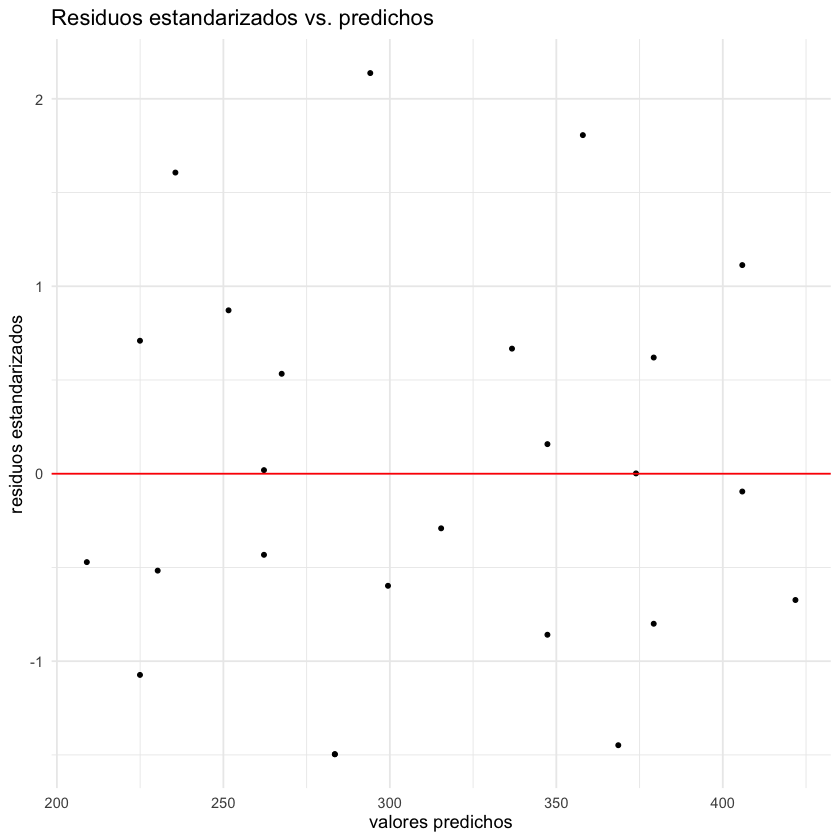

In [104]:
# Grafico residuos estandarizados vs predichos
res.pred.df <- data.frame(x=regresion$fitted.values, y=rstandard(regresion))
ggplot(data=res.pred.df, aes(x,y)) +
  geom_point(size=1) +
  geom_hline(yintercept = 0, color="red") +
  theme_minimal() +
  labs(title = "Residuos estandarizados vs. predichos",
       x = "valores predichos",
       y = "residuos estandarizados")

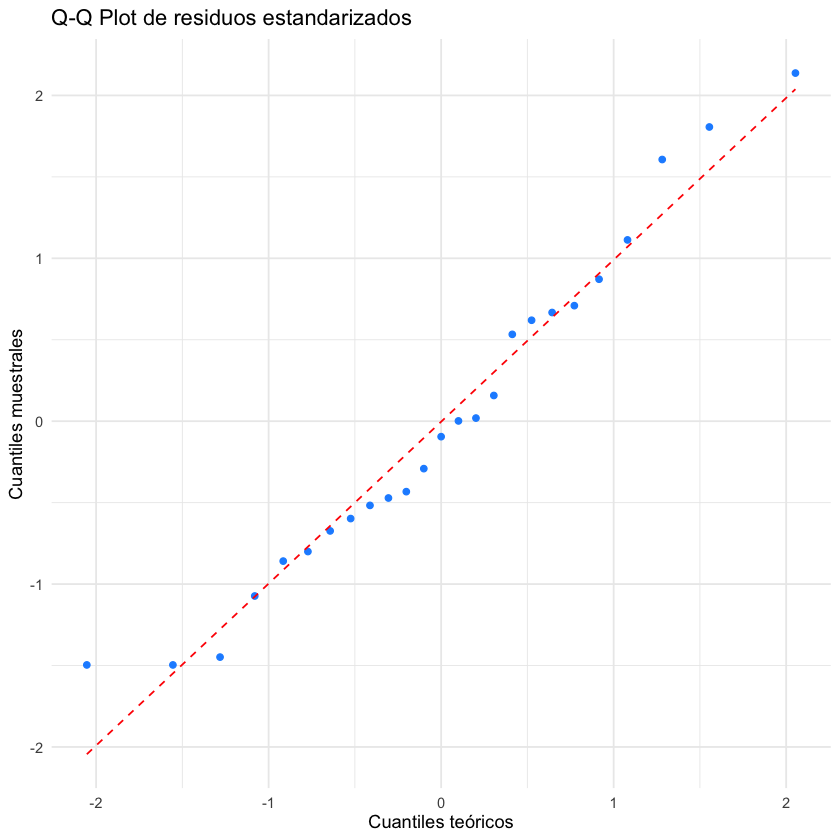

In [103]:
# qqplot residuos estandarizados (testeo que garantiza normalidad)
ggplot(data = data.frame(residuos = rstandard(regresion)), aes(sample = residuos)) +
  stat_qq(color = "dodgerblue") +
  stat_qq_line(color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Q-Q Plot de residuos estandarizados",
       x = "Cuantiles te√≥ricos",
       y = "Cuantiles muestrales")

## Calidad del ajuste

* Descomposici√≥n de la suma de cuadrados

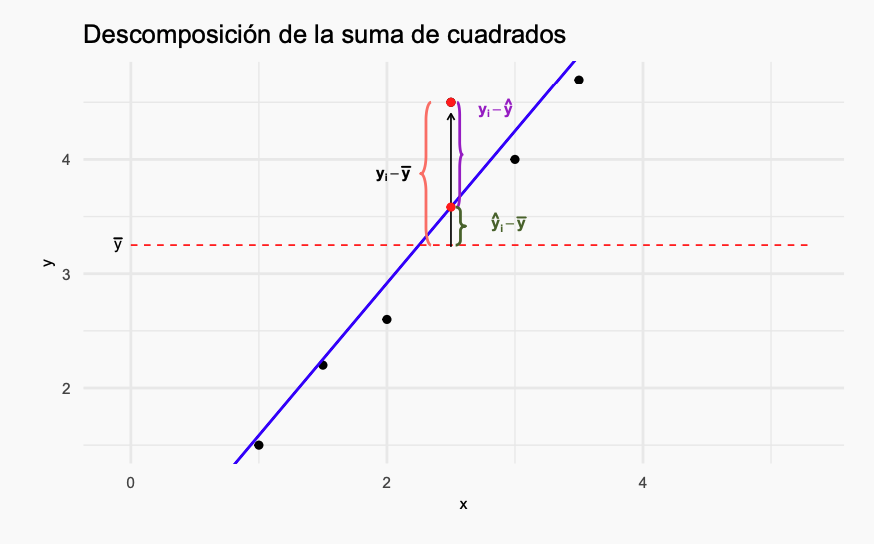

* Yi ‚àí ¬ØY = Yi ‚àí ^Yi + ^Yi ‚àí ¬ØY
* Desviaci√≥n total:                                   Yi ‚àí ¬ØY
* Desv√≠o de los predichos respecto de la media:      ^Yi ‚àí ¬ØY
* Desv√≠o alrededor de la recta de regresi√≥n ajustada: Yi ‚àí ^Yi

* **Coeficiente de determinaci√≥n R^2**: indica qu√© parte de la variabilidad total de la variable dependiente Y es explicada por la variable independiente. Por lo tanto, sirve como una medida del poder predictivo del modelo

In [44]:
summary(regresion)


Call:
lm(formula = grasas ~ edad, data = grasas)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.816  -3.854  28.315  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5751    29.6376   3.461  0.00212 ** 
edad          5.3207     0.7243   7.346 1.79e-07 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 43.46 on 23 degrees of freedom
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6882 
F-statistic: 53.96 on 1 and 23 DF,  p-value: 1.794e-07


* Multiple R-squared:  0.7012  **es R^2**
* El valor 0.7012 implica una relaci√≥n lineal moderadamente fuerte entre la edad de la persona y la cantidad de grasas en sangre
* Este valor indica que el modelo explica un 70.12 % de la variabilidad observada
* Por lo tanto, un 29.88 % de la variabilidad observada no queda explicada por el modelo

## Inferencia para los par√°metros del modelo

In [105]:
# Intervalos de confianza para los par√°metros
confint(regresion) # nivel de confianza por default es 0.95

2.5 %     97.5 %    
(Intercept) 41.265155 163.885130
edad         3.822367   6.818986

In [107]:
# Cambiando el nivel de confianza
confint(regresion, level = 0.90)

5 %       95 %      
(Intercept) 51.780153 153.370132
edad         4.079335   6.562018

In [114]:
# Intervalo de confianza para ùúé^2
# El estimador de la desviaci√≥n t√≠pica de los errores, ùúé, figura como Residual standard error 
# y su valor en el ejemplo es 43.5. Este valor se puede obtener con la instrucci√≥n sigma(regresion)
alfa <- 0.05
n <- dim(grasas)[1]
LSsigma <- (n-2) * sigma(regresion)^2 / qchisq(1-alfa / 2, n-2)
LIsigma <- (n-2) * sigma(regresion)^2 / qchisq(alfa / 2, n-2)
LSsigma
LIsigma

[1] 1141.002

[1] 3716.831

### C√°lculo de predicciones

In [115]:
# predicci√≥n para estimar la cantidad de grasas en sangre de individuos cuyas edades van de 30 a 45 a√±os
nuevas_edades <- data.frame(edad = c(30,45))
nuevas_edades

predict(regresion, nuevas_edades)

edad
1 30  
2 45

1        2 
262.1954 342.0056

### Intervalos de confianza y predicci√≥n

In [119]:
# Intervalo de confianza para predicciones individuales
predict(regresion, newdata=nuevas_edades, interval="prediction")

fit      lwr      upr     
1 262.1954 169.4957 354.8952
2 342.0056 249.8962 434.1150

In [120]:
# Intervalo de confianza para las predicciones de valores medios
predict(regresion, newdata=nuevas_edades, interval="confidence")


fit      lwr      upr     
1 262.1954 239.6112 284.7797
2 342.0056 321.9820 362.0292

**Observaci√≥n**: Notar que la predicci√≥n del valor medio tiene un intervalo m√°s estrecho que la predicci√≥n de valores individuales. Esto es l√≥gico, pues el valor medio es siempre menos variable que los valores individuales

In [124]:
# Intervalo de confianza y predicci√≥n para un conjunto de nuevas observaciones
nuevas_edades <- data.frame(edad = seq(20, 60))

In [125]:
# Intervalo de confianza para la respuesta media
ic_con <- predict(regresion, nuevas_edades, interval = 'confidence')

In [126]:
# Intervalos de predicci√≥n
ic_pred <- predict(regresion, nuevas_edades, interval = 'prediction')

nuevas_edades_con_df <- cbind(nuevas_edades, ic_con)
nuevas_edades_pred_df <- cbind(nuevas_edades, ic_pred)
head(nuevas_edades_con_df)
head(nuevas_edades_pred_df)

edad fit      lwr      upr     
1 20   208.9887 175.1653 242.8120
2 21   214.3093 181.7453 246.8734
3 22   219.6300 188.3042 250.9558
4 23   224.9507 194.8395 255.0619
5 24   230.2714 201.3482 259.1946
6 25   235.5921 207.8268 263.3573

edad fit      lwr      upr     
1 20   208.9887 112.9303 305.0470
2 21   214.3093 118.6871 309.9316
3 22   219.6300 124.4224 314.8377
4 23   224.9507 130.1357 319.7657
5 24   230.2714 135.8270 324.7158
6 25   235.5921 141.4958 329.6883

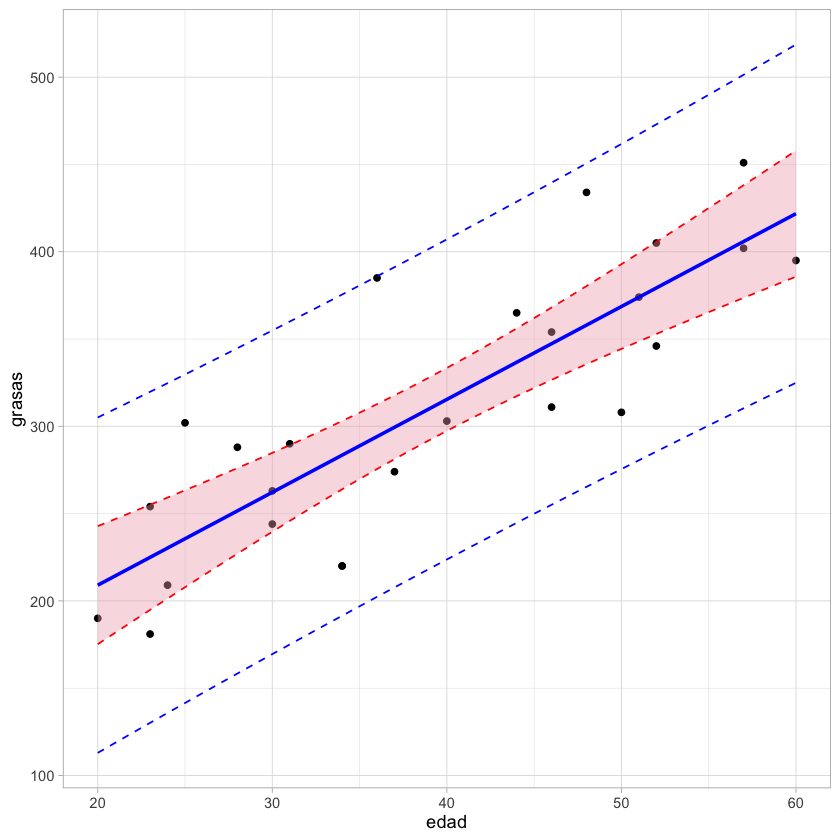

In [127]:
ggplot(grasas, aes(x=edad, y=grasas))+
  geom_point()+
  geom_smooth(method=lm, formula=y~x, se=TRUE, level=0.95, col='blue', fill='pink2') +
  geom_line(data = nuevas_edades_con_df,aes(x=edad,y=lwr), color="red", 
            linetype="dashed") +
  geom_line(data = nuevas_edades_con_df,aes(x=edad,y=upr),color="red",
            linetype="dashed")+     
  geom_line(data = nuevas_edades_pred_df,aes(x=edad,y=lwr),color="blue",
            linetype="dashed")+
  geom_line(data = nuevas_edades_pred_df,aes(x=edad,y=upr), color="blue",
            linetype="dashed") +
  theme_light()